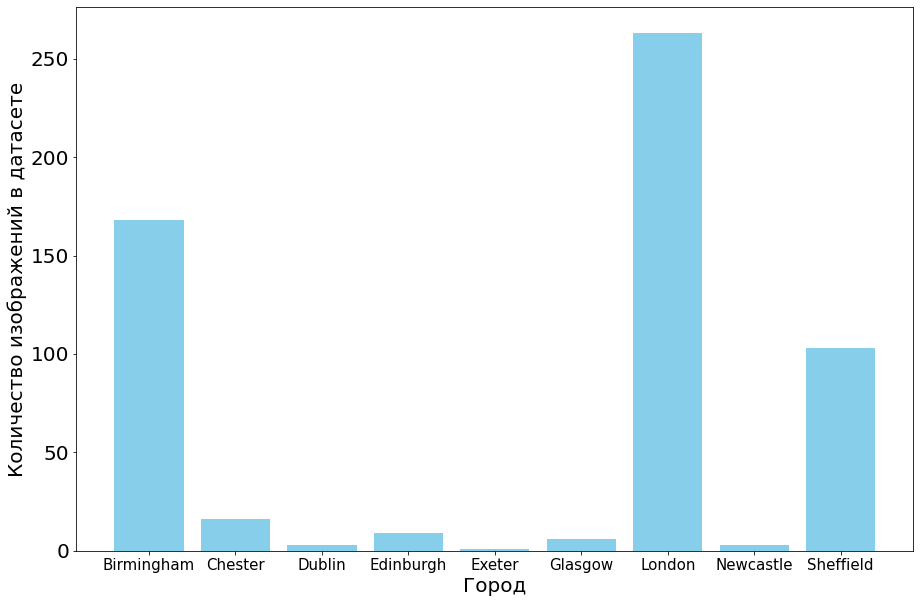

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('../Data/ClassificationCity/city_year.csv')

plt.figure(figsize=(15, 10))
plt.bar(
    list(data['city'].value_counts().sort_index().index.map(lambda x: x.capitalize())),
    data['city'].value_counts().sort_index().values,
    color = "skyblue"
)
plt.xlabel('Город', fontsize=20)
plt.ylabel('Количество изображений в датасете', fontsize=20)


plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.savefig('city_hist.png')
plt.show()

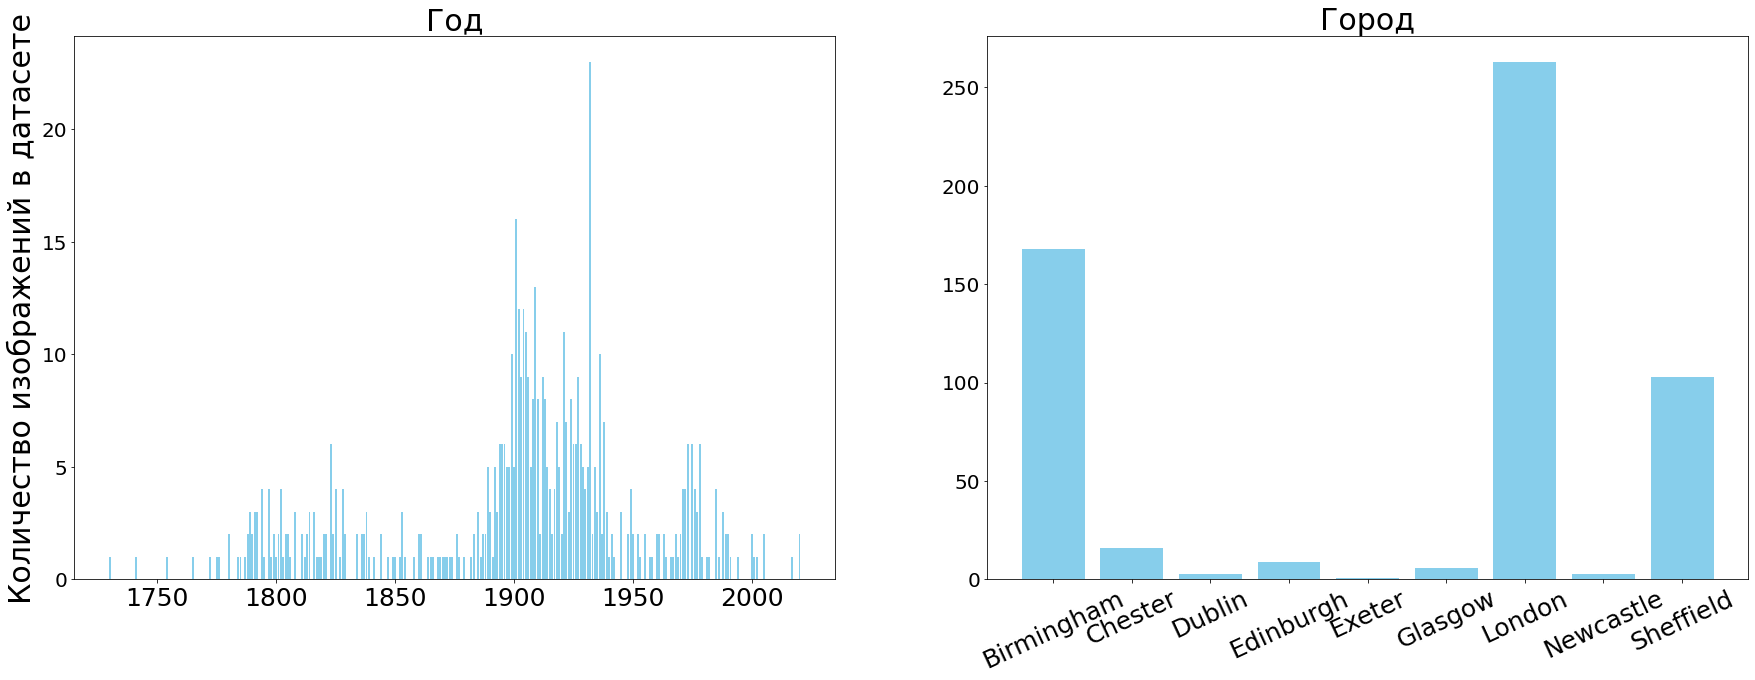

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

data = pd.read_csv('../Data/ClassificationCity/city_year.csv')

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.bar(
    data['year'].value_counts().sort_index().index,
    data['year'].value_counts().sort_index().values,
    color = "skyblue"
)
plt.title('Год', fontsize=30)
plt.ylabel('Количество изображений в датасете', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.title('Город', fontsize=30)

plt.bar(
    list(data['city'].value_counts().sort_index().index.map(lambda x: x.capitalize())),
    data['city'].value_counts().sort_index().values,
    color = "skyblue"
)
plt.xticks(fontsize=25, rotation=25)
plt.yticks(fontsize=20)
plt.savefig('both.png')
plt.show()


# 300 represents number of points to make between T.min and T.max

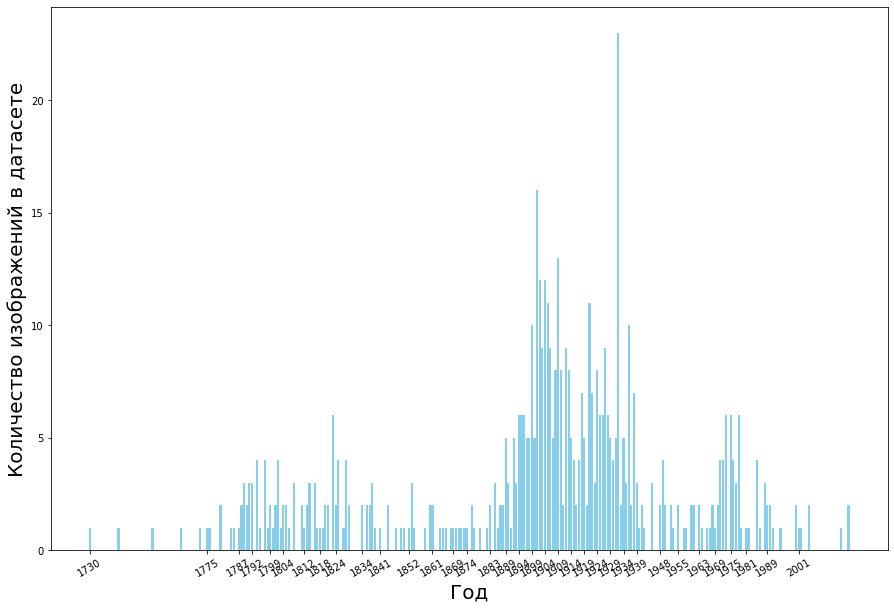

In [20]:
plt.figure(figsize=(15, 10))
plt.bar(data['year'].value_counts().sort_index().index, data['year'].value_counts().sort_index().values, color = "skyblue")
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество изображений в датасете', fontsize=20)

xticks = list(filter(lambda x: x != 0,
                [j if i % 5 == 0 else 0 for i, j in enumerate(data['year'].value_counts().sort_index().index)]))
plt.xticks(xticks, rotation=30)
# plt.xticks([i for i in range(1, 17)]);
plt.savefig('graph2')


In [25]:
data['year'].value_counts()


1932    23
1901    16
1909    13
1902    12
1904    12
        ..
1891     1
1817     1
1812     1
1806     1
1730     1
Name: year, Length: 175, dtype: int64

In [69]:
spl = make_interp_spline(list(data['year'].value_counts().sort_index().values), 3, k=3)  # type: BSpline
power_smooth = spl(list(data['year'].value_counts().sort_index().index))

plt.plot(list(data['year'].value_counts().sort_index().index), power_smooth)
plt.show()

AxisError: axis 0 is out of bounds for array of dimension 0

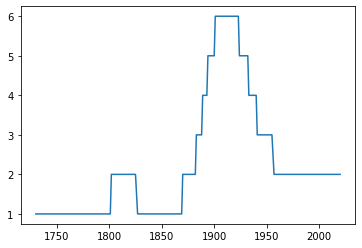

In [149]:
from scipy.ndimage import gaussian_filter1d



T = np.array(list(data['year'].value_counts().sort_index().index))
power = np.array(list(data['year'].value_counts().sort_index().values))

y_smoothed = gaussian_filter1d(power, sigma=13)

plt.plot(T, y_smoothed)
plt.show()

In [ ]:
#

# Letter distribution

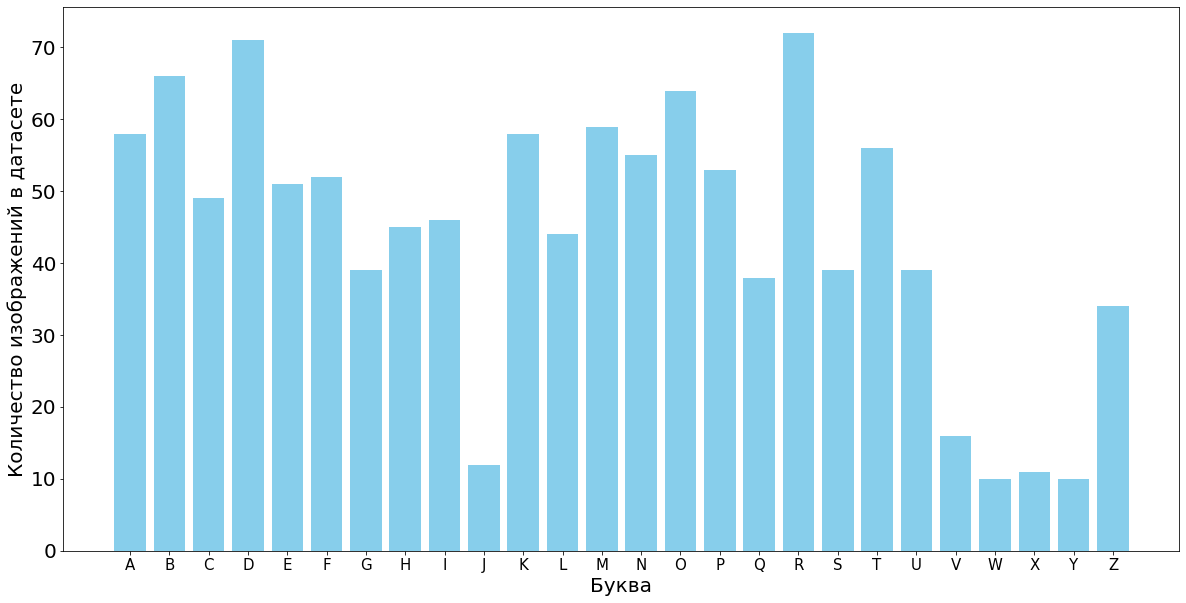

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

letter_df = pd.read_csv('../Data/ClassificationYear/letters_train.csv')
letter_df = letter_df[letter_df['LabelName'] != 'Other']
plt.figure(figsize=(20, 10))
plt.bar(
    list(letter_df['LabelName'].value_counts().sort_index().index.map(lambda x: x.capitalize())),
    letter_df['LabelName'].value_counts().sort_index().values,
    color = "skyblue"
)
plt.xlabel('Буква', fontsize=20)
plt.ylabel('Количество изображений в датасете', fontsize=20)


plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.savefig('letter_hist.png')
plt.show()

In [5]:
letter_df['LabelName'].value_counts().describe()


count    26.000000
mean     44.115385
std      18.891960
min      10.000000
25%      38.250000
50%      47.500000
75%      57.500000
max      72.000000
Name: LabelName, dtype: float64